---
title: Introduction
jupyter: python3
---


The segmentation gives us the label image that marks distinct objects in the
original image with unique ID. We can use this label image together with the
original input intensity image to get the proprieties of each object in the
image. 


# Shape feature extraction

Shape features correspond to the geometric shape of the object.  To determine
the shape feature, we no not need the intensity image, we just need the label
map.  The most important shape feature is the size of the objects. Other
features include the object location, major and major axis length,
eccentricity, etc. 

Text(0, 0.5, 'Number of cells')

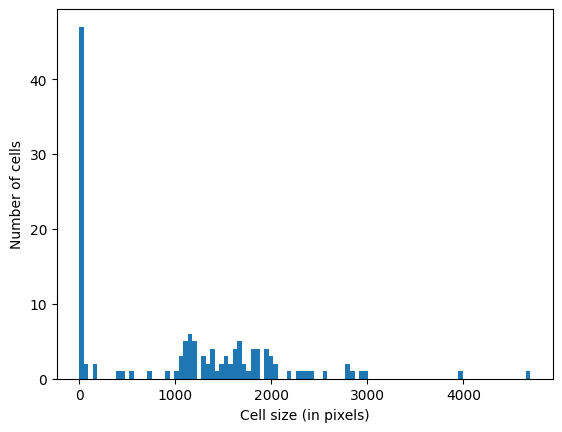

In [75]:
# Load the required libraries
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

# Load the cell images
img = ski.io.imread("data/F01_202w2.TIF")


# Get the Triangle threshold
binary_thresh = ski.filters.threshold_triangle(img)

# Binary threshold the image
img_binary = img > binary_thresh

# Get the connected components segmentation
label_img = ski.morphology.label(img_binary)

# Get the shape properties
shape_features = ski.measure.regionprops(label_img)

# put the required features in an array for plotting
area = []
eccentricity = [] 
for obj in shape_features:
    area.append(obj.area)

fig, ax = plt.subplots()
_ = ax.hist(area, bins = 100)
ax.set_xlabel('Cell size (in pixels)')
ax.set_ylabel('Number of cells')

# Intensity feature extraction

Image intensity features take both the original input image and the label map.
For each object we can get features such as the mean, standard deviation,
minimum, and maximum intensity values. 

Text(0, 0.5, 'SD of intensity')

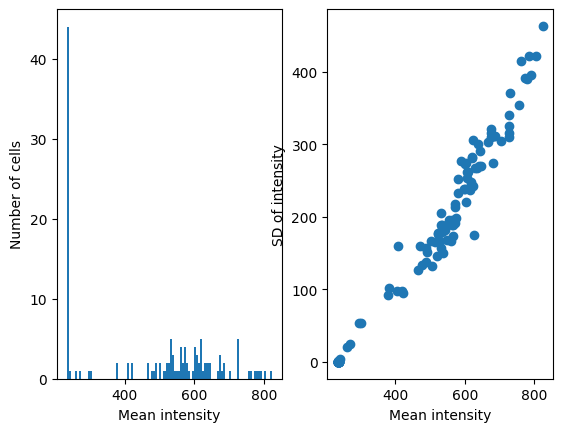

In [76]:
intensity_features = ski.measure.regionprops(label_img, intensity_image = img)

mean = []
std = [] 
for obj in intensity_features:
    mean.append(obj.intensity_mean)
    std.append(obj.intensity_std)

fig, ax = plt.subplots(1, 2)
ax[0].hist(mean, bins = 100)
ax[0].set_xlabel('Mean intensity')
ax[0].set_ylabel('Number of cells')
ax[1].scatter(mean, std)
ax[1].set_xlabel('Mean intensity')
ax[1].set_ylabel('SD of intensity')